# Portfolio Project: Life Expectancy and GDP

### Introduction

In this project, I will explore if there is a strong relationship between a country's Gross Domestic Product (GDP) and the life expectancy of its inhabitants. I will explore this relationship through analyzing and visualizing relevant data from six countries. Often, visualizing the data is the most efficient way of understanding it. 

I will be addressing the following questions in my analysis:
- What is the trend of life expectancy over time?
- What is the trend of GDP over time?
- What is the average life expectancy in each country?
- What is the distribution of that life expectancy and GDP?
- Is there a linear relationship between life expectancy and GDP?

Sources:
- GDP Data: World Bank and OECD national accounts data files
- Life expectancy Data: World Health Organization reports

### Importing Modules

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt

### Loading the Data

In [2]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Exploring the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [4]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [5]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

### Cleaning the Data

In [6]:
df.columns = ['country', 'year', 'life_expectancy', 'GDP']

### Visualizing the Data

##### Evolution by year

In [7]:
means_by_year = df.drop('country',axis=1).groupby('year').mean().reset_index()
sums_by_year = df.drop('country',axis=1).groupby('year').sum().reset_index()

In [8]:
by_year = sums_by_year.drop('life_expectancy', axis=1)
by_year['average_life_expectancy'] = means_by_year.life_expectancy
by_year.rename(columns = {'GDP':'total_GDP'}, inplace=True)
by_year.head()

,year,total_GDP,average_life_expectancy
0,2000,1.422950e+13,70.766667
1,2001,1.469251e+13,70.833333
2,2002,1.536733e+13,70.950000
3,2003,1.646068e+13,71.033333
4,2004,1.794988e+13,71.300000


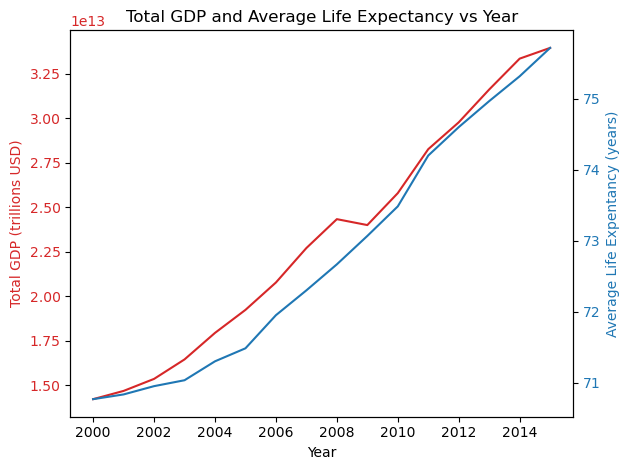

<Figure size 640x480 with 0 Axes>

In [9]:
# Here, I will map both the Total GDP by Year and the Average Life Expectancy by Year on the same x-axis
fig, ax1 = plt.subplots()
plt.title('Total GDP and Average Life Expectancy vs Year')

# First create the Total GDP line
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total GDP (trillions USD)', color=color)
ax1.plot(by_year.year, by_year.total_GDP, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Using the same x-axis, create the life-expectancy line
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Life Expentancy (years)', color=color)
ax2.plot(by_year.year, by_year.average_life_expectancy, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Formate figure
fig.tight_layout()
plt.show()
plt.clf()

Note: By plotting the evolution of GDP and Life expectancy on the same x-axis, we notice that between 2000-2015 the Total GDP and Average Life Expectancy follow a very similar evolution, hinting to a high correlation between the two.

##### Means by country

### Life Expectancy

##### Life expectancy distribution

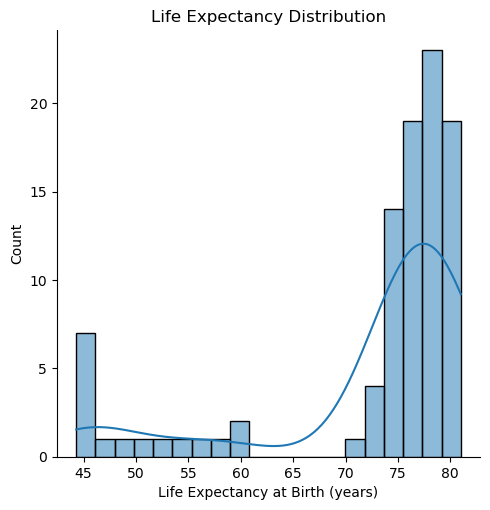

<Figure size 640x480 with 0 Axes>

In [10]:
sns.displot(df.life_expectancy, kde=True, bins=20)
plt.title('Life Expectancy Distribution')
plt.xlabel('Life Expectancy at Birth (years)')
plt.show()
plt.clf()

Note: In the graph above, we notice that the distribution of the life expectancy in years i highly left-skewed, as most of the values are in the mid to high 70s. We can also observe another mode in the distribution in the mid to high 40s. 

##### Average life expectancy by country

In [11]:
means_by_country = df.drop('year',axis=1).groupby('country').mean().reset_index()
means_by_country.head()

,country,life_expectancy,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13


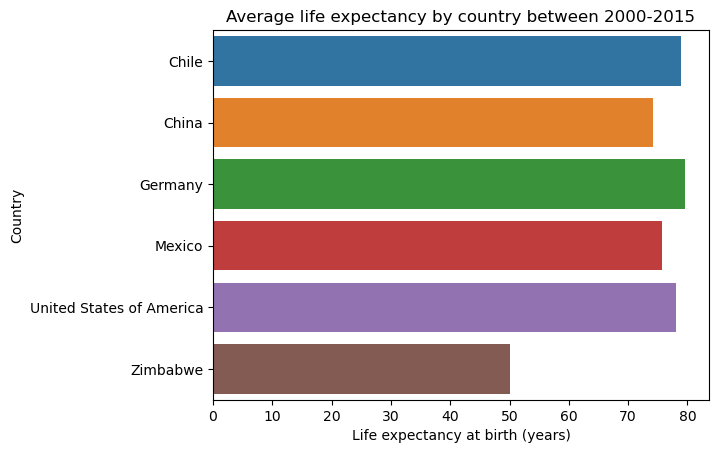

<Figure size 640x480 with 0 Axes>

In [12]:
sns.barplot(x='life_expectancy', y='country', data = means_by_country)
ax = plt.subplot()
plt.title('Average life expectancy by country between 2000-2015')
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('Country')
plt.show()
plt.clf()

Note: In the plot above, I have demonstrate the Average life expectancy by country for the years 2000-2015. We notice that all countries, except Zimbabwe have an average life expectancy in the mid to high 70s, while Zimbabwe averages an life expectancy of 50 years. This illustration perfectly ties in with the previous graph, as it explains the skew of the life expectancy distribution, as well as the multiple modes.

##### Life expectancy evolution over time

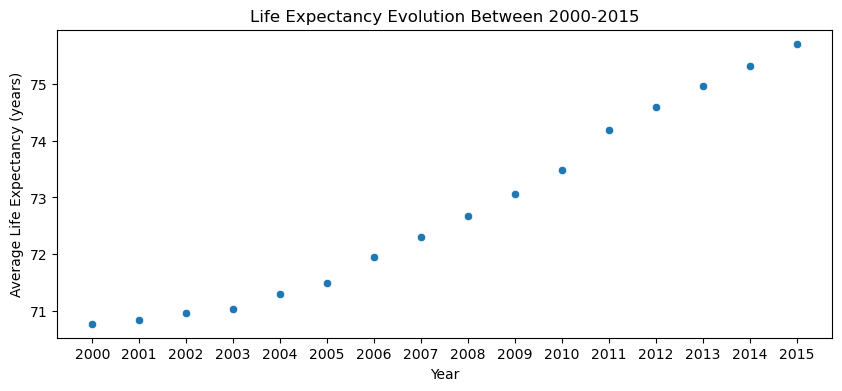

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
sns.scatterplot(x='year', y='life_expectancy', data=means_by_year)
plt.title('Life Expectancy Evolution Between 2000-2015')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy (years)')
ax.set_xticks(means_by_year.year)
ax.set_xticklabels(means_by_year.year)
plt.show()
plt.clf()

##### Life expectancy evolution by country

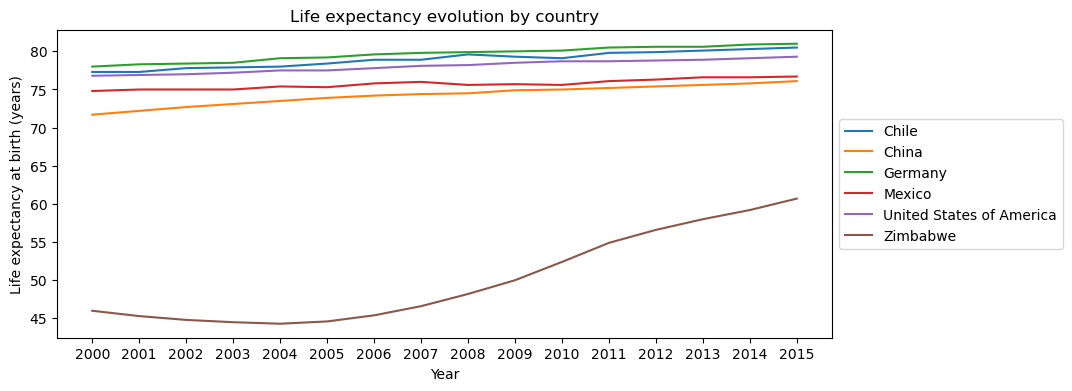

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(10,4))
sns.lineplot(x='year',y='life_expectancy', hue='country', data = df)
plt.title('Life expectancy evolution by country')
plt.xlabel('Year')
plt.ylabel('Life expectancy at birth (years)')
ax = plt.subplot()
ax.set_xticks(means_by_year.year)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()
plt.clf()

Note: Here, we see the breakdown of the life expectancy evolution by country. The graph reveals that all countries, apart from Zimbabwe have seen a moderate and steady increase in their life expectancy between 2000-2015. Zimbabwe, on the other hand, has experienced the greatest incease in life expectancy, following a small decrease around 2004. It also becomes obvious that Zimbabwe has the lowest life expectancy overall among the countries we are investigating, while Germany has the highest, closely followed by Chile.  

### GDP

##### GDP Distribution

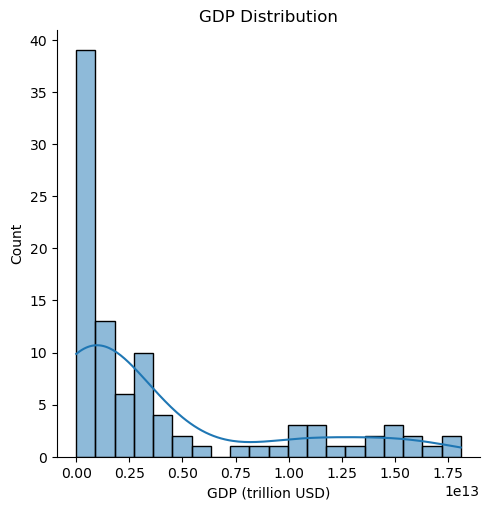

<Figure size 640x480 with 0 Axes>

In [15]:
sns.displot(df.GDP, kde=True, bins=20)
plt.title('GDP Distribution')
plt.xlabel('GDP (trillion USD)')
plt.show()
plt.clf()

Note: In this distribution graph, I have demonstrated the distribution of GDP values in the dataset. We observe that the distribution is highly right skewed, as most values are on the left side of the graph. Multiple nodes are also visible, making this an almost exactly opposite picture to what we observed in the distribution of life expectancy earlier. 

##### Average GDP by country

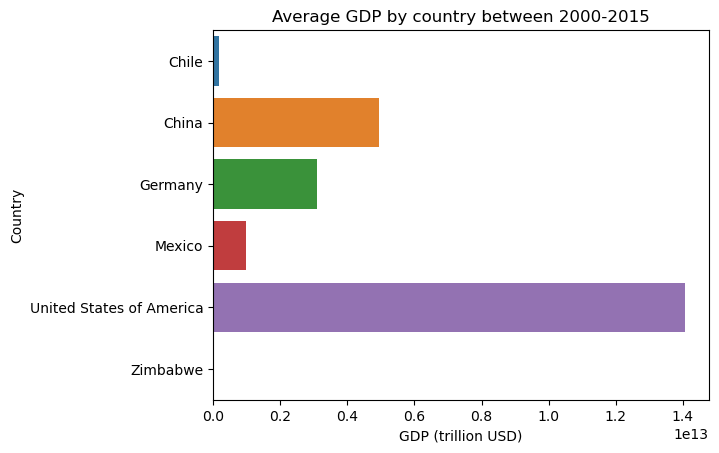

<Figure size 640x480 with 0 Axes>

In [16]:
sns.barplot(x='GDP', y='country', data = means_by_country)
ax = plt.subplot()
plt.title('Average GDP by country between 2000-2015')
plt.xlabel('GDP (trillion USD)')
plt.ylabel('Country')
plt.show()
plt.clf()

Note: In the chart above, I have visualized the average GDP by country for the years 2000-2015. It becomes immediately apparent that the USA produces a much higher GDP than all countries, almost three times that of Chine, that comes second in line. Zimbabwe and Chile are barely visible on the bar chart, indicating very low GDP values. This plot explains the distribution of the GDP values, justifying both the right-hand tail and the multiple modes observed.

##### GDP evolution over time

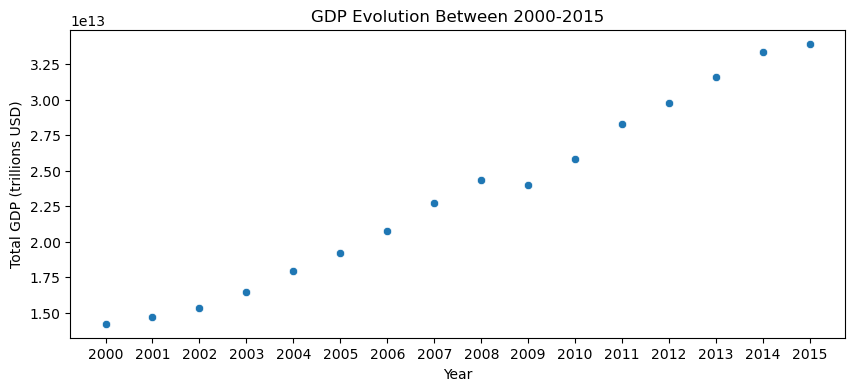

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='year', y='GDP', data=sums_by_year)
ax = plt.subplot()
plt.title('GDP Evolution Between 2000-2015')
plt.xlabel('Year')
plt.ylabel('Total GDP (trillions USD)')
ax.set_xticks(means_by_year.year)
ax.set_xticklabels(means_by_year.year)
plt.show()
plt.clf()

##### GDP evolution by country

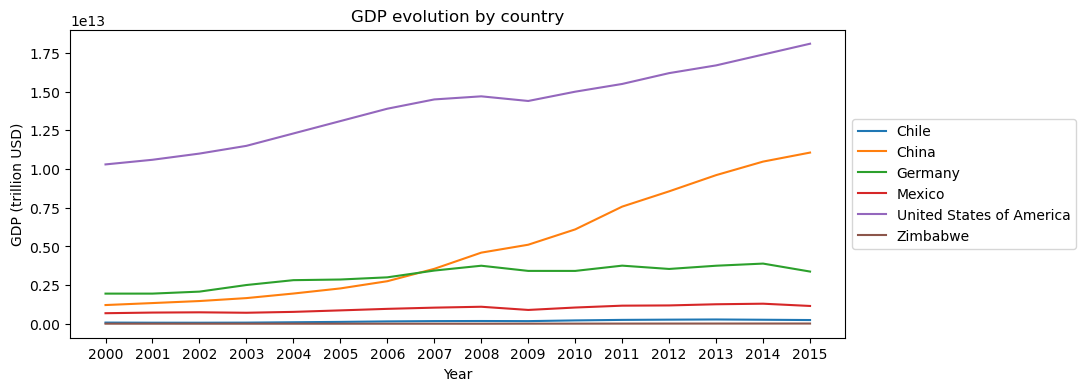

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(10,4))
sns.lineplot(x='year',y='GDP', hue='country', data = df)
plt.title('GDP evolution by country')
plt.xlabel('Year')
plt.ylabel('GDP (trillion USD)')
ax = plt.subplot()
ax.set_xticks(means_by_year.year)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()
plt.clf()

Note: The line chart above shows the GDP evolution by country between 2000-2015. We notice that while Germany, Mexico, Chile and Zimbabwe appear to have low growth on their GDP, the USA and China have experienced significant growth in this time period. Chine seems to have achieved the greatest increase, while the USA is highest in terms of absolute GDP values. 

### GDP vs Life Expectancy by Country

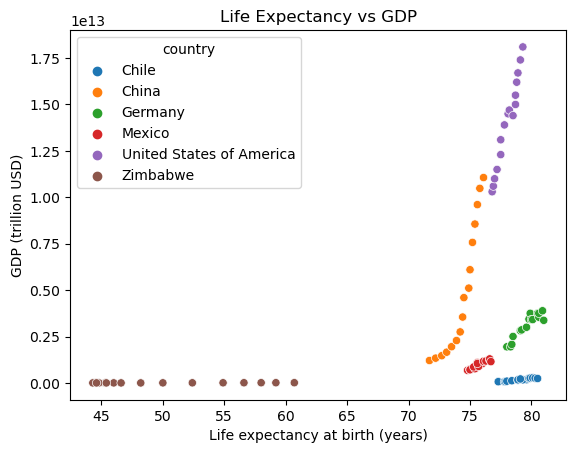

<Figure size 640x480 with 0 Axes>

In [19]:
sns.scatterplot(x='life_expectancy', y='GDP', hue='country', data=df)
plt.title('Life Expectancy vs GDP')
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('GDP (trillion USD)')
plt.show()
plt.clf()

Note: The scatter plot above demonstrate the relationship between GDP and life expectancy at birth for the years 2000-2015. Each country is depicted using a different color. This graph shows a linear relationship between GDP and life expectancy, as the latter increases along with GDP. The USA and China seem to have very similar and steep slopes, while the trends of other countries are relatively flatter. In the scatter plots below, we will break down the above graph for each individual country, which will allow us to examine the trends in more detail, as each graph will have its own x and y axes. 

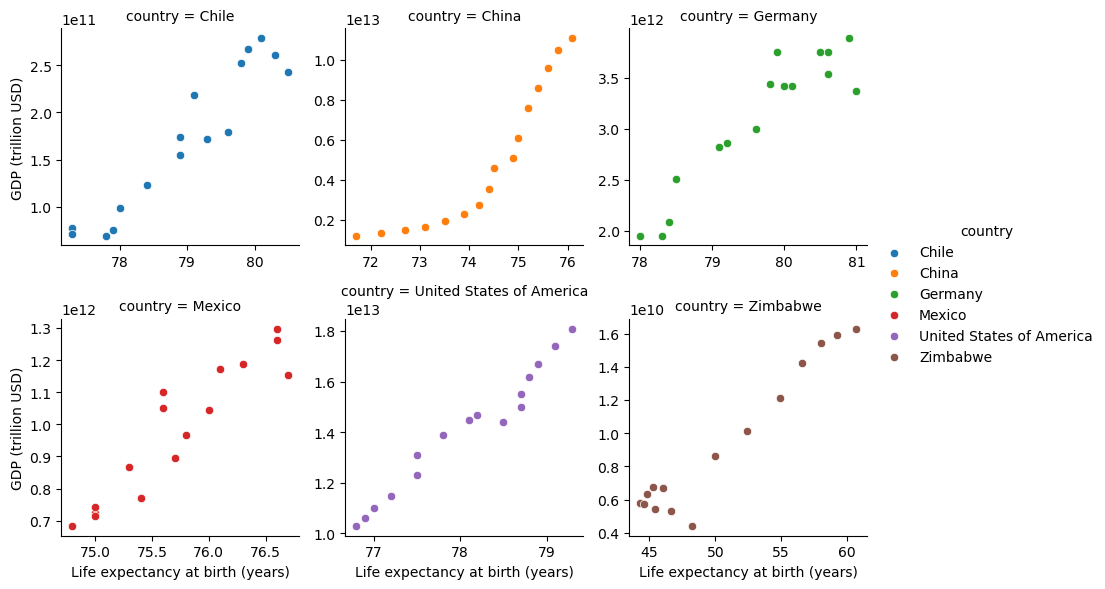

In [20]:
graph = sns.FacetGrid(df, col="country", col_wrap=3,
                      hue = "country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"life_expectancy", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP (trillion USD)"));

Note: As mentioned above, the relationship between GDP and Life Expectancy is now broken down for each country separately. Having separate axes for each graph reveals that all countries, including Zimbabwe have actually experienced an increase in both GDP and life expectancy, despite their curves looking much flatter when the same scale was used for all countries. Most coutries, including the USA and Mexico, demonstrate a linear relationship between GDP and life expectancy. China, however, seems to have a slightly exponential curve. Overall, a positive correlation between GDP and life expectancy is present. 

### Conclusions

Despite only having a small dataset available, we have managed to extract a lot of information about the GDP and life expectancy of the countries, as well as the relationship between the two. Many data visualizations were created, which made the data much more easily digestible and readable. 

Through visualizing the available data, I was able to answer some of the questions formulated in the beginning of the project:
- What is the trend of life expectancy over time?
    - Life expectnacy has increased over time for all 6 countries investigated, with Zimbabwe showing the greatest increase among them
- What is the trend of GDP over time?
    - GDP has also increased for all 6 countries between 2000-2015, with China and the USA having achieved the greatest growth
- What is the average life expectancy in each country?
    - The average life expectancy for most countries for that time period was estimated to be in the mid to high 70s, except for Zimbabwe, where the average life expectancy was around 50 years
- What is the distribution of that life expectancy and GDP?
    - Life expectancy and GDP have the opposite ditribution: Life expectancy is left-skewed, while GDP is right-skewed and both had multiple nodes that could be identified
- Is there a linear relationship between life expectancy and GDP?
    - All countries, except maybe China, show a mostly linear relationship between life expectancy and GDP, revealing a high positive correlation between the two